In [1]:
import pandas as pd

In [2]:
tr = pd.read_excel("E:/dataset/00_SBA_TeamProject/00_190916/train.xlsx")
test = pd.read_excel("E:/dataset/00_SBA_TeamProject/00_190916/test.xlsx")

In [20]:
print(tr.columns)
print(test.columns)
tr

Index(['year', 'actual', 'vehicle', 'charging station', 'weight', 'article'], dtype='object')
Index(['year', 'vehicle'], dtype='object')


,year,actual,vehicle,charging station,weight,article
0,1,2011,338,33,60330,11888
1,2,2012,753,85,80480,8840
2,3,2013,780,59,100650,14588
3,4,2014,1075,60,120840,22462
4,5,2015,2907,100,141050,32971
5,6,2016,5914,154,161280,50272
6,7,2017,13826,442,181530,68660
7,8,2018,31696,766,201800,110078


In [53]:
sel = ['actual']
X = tr[sel]
y = tr['vehicle']
# print(X[5:])

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [55]:
model = PolynomialFeatures(degree=2)
x_poly = model.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)
lin_reg_2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
import matplotlib.pyplot as plt

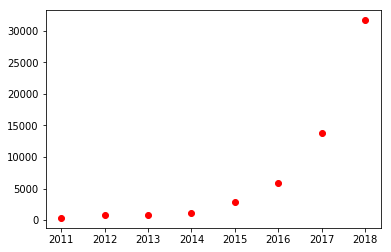

In [57]:
plt.scatter(X, y, color='red')

Text(0,0.5,'vehicle')

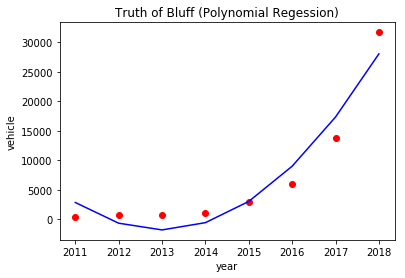

In [59]:
pred = lin_reg_2.predict(x_poly)
plt.scatter(X, y, color='red')
plt.plot(X, pred, color= 'blue')
plt.title('Truth of Bluff (Polynomial Regession)')
plt.xlabel('year')
plt.ylabel('vehicle')

In [60]:
year_dat = np.arange(2019, 2035)
print(year_dat)
newdata = pd.DataFrame( {'year':year_dat} )
# newdata = pd.DataFrame( {'year':[9, 10, 11,12,13,14,15,16, 17, 18, 19, 20]} )
x_poly_new = model.fit_transform(newdata)
newdata

NameError: name 'np' is not defined

In [49]:
pred_new = lin_reg_2.predict(x_poly_new)
pred_new

array([ 41097.55357143,  56528.86309524,  74327.13690476,  94492.375     ,
       117024.57738095, 141923.74404762, 169189.875     , 198822.9702381 ,
       230823.0297619 , 265190.05357143, 301924.04166667, 341024.99404762])

Text(0,0.5,'vehicle')

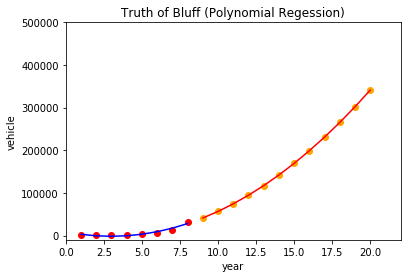

In [52]:
plt.scatter(X, y, color='red')
plt.scatter(newdata, pred_new, color='orange')  # 예측

plt.plot(X, pred, color= 'blue')
plt.plot(newdata, pred_new, color= 'red')         # 예측

plt.xlim(0, 22)
plt.ylim(-10000, 500000)
plt.title('Truth of Bluff (Polynomial Regession)')
plt.xlabel('year')
plt.ylabel('vehicle')


array([33008.8, 39665.2, 46321.6, 52978. , 59634.4, 66290.8])

In [56]:
### actual를 활용했을 때
sel = ['actual']
X = tr[sel]
y = tr['vehicle']
print(X[5:])
print(y[5:])

   actual
5    2014
6    2015
7    2016
8    2017
9    2018
5     2775
6     5712
7    10885
8    13826
9    32000
Name: vehicle, dtype: int64


In [57]:
import numpy as np

In [58]:
year_dat = np.arange(2019, 2052)
print(year_dat)
newdata = pd.DataFrame( {'year':[2019,2020,2021,2022,2023,2024]} )
model = LinearRegression()
model.fit(X[5:], y[5:])
pred = model.predict(newdata)
pred

[2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032
 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046
 2047 2048 2049 2050 2051]


array([33008.8, 39665.2, 46321.6, 52978. , 59634.4, 66290.8])

In [64]:
type(pred)
y = y[5:]
print(type(y), y.keys)
#y.append(1)
y

<class 'pandas.core.series.Series'> <bound method Series.keys of Series([], Name: vehicle, dtype: int64)>


In [44]:
pred_S = pd.Series(pred)
pred_S

0    33008.8
1    39665.2
2    46321.6
3    52978.0
4    59634.4
5    66290.8
dtype: float64